In [9]:
import pandas as pd

# 读取txt文件，假设文件中的数据是以逗号分隔的
data = pd.read_csv('nba高阶数据.txt', delimiter=',')

# 将数据保存为csv格式
data.to_csv('nba高阶数据.csv', index=False)

In [14]:
import pandas as pd


data1 = pd.read_csv('nba.csv')

# 按照Player名字对第一个文件进行排序并更新RK值
data1.sort_values(by='Player', inplace=True)
data1.reset_index(drop=True, inplace=True)
data1['Rk'] = data1.index + 1

    # 读取第二个CSV文件
data2 = pd.read_csv('nba高阶数据.csv')

    # 按照Player名字对第二个文件进行排序并更新RK值
data2.sort_values(by='Player', inplace=True)
data2.reset_index(drop=True, inplace=True)
data2['Rk'] = data2.index + 1

    # 保存排序后的第一个文件（可选）
data1.to_csv('nba1.csv', index=False)

    # 保存排序后的第二个文件（可选）
data2.to_csv('nba高阶数据1.csv', index=False)

print("排序完成。")

排序完成。


In [3]:
import pandas as pd

# 读取第一个CSV文件
data1 = pd.read_csv('nba1.csv')

# 读取第二个CSV文件
data2 = pd.read_csv('nba高阶数据1.csv')

# 使用merge函数进行合并，默认是内连接（取交集），这里通过设置how='outer'来实现并集
merged_data = pd.merge(data1, data2, on=['Player','Team'], how='left')

# 将合并后的数据保存为新的CSV文件（可选）
merged_data.to_csv('总nba1.csv', index=False)

In [11]:
import pandas as pd

# 定义球队全称和简称的对应字典
team_full_names = ["Atlanta Hawks", "Boston Celtics", "Brooklyn Nets", "Charlotte Hornets", "Chicago Bulls",
                   "Cleveland Cavaliers", "Dallas Mavericks", "Denver Nuggets", "Detroit Pistons",
                   "Golden State Warriors", "Houston Rockets", "Indiana Pacers", "Los Angeles Clippers",
                   "Los Angeles Lakers", "Memphis Grizzlies", "Miami Heat", "Milwaukee Bucks", "Minnesota Timberwolves",
                   "New Orleans Pelicans", "New York Knicks", "Oklahoma City Thunder", "Orlando Magic",
                   "Philadelphia 76ers", "Phoenix Suns", "Portland Trail Blazers", "Sacramento Kings",
                   "San Antonio Spurs", "Seattle SuperSonics", "Toronto Raptors", "Utah Jazz", "Washington Wizards"]
team_short_names = ["ATL", "BOS", "BRK", "CHO", "CHI", "CLE", "DAL", "DEN", "DET", "GSW", "HOU", "IND", "LAC",
                    "LAL", "MEM", "MIA", "MIL", "MIN", "NOP", "NYK", "OKC", "ORL", "PHI", "PHO", "POR", "SAC",
                    "SAS", "SEA", "TOR", "UTA", "WAS"]

# 创建对应字典
replacement_dict = dict(zip(team_full_names, team_short_names))

# 读取包含球队全称的CSV文件
df = pd.read_csv('nba球队数据.csv')

# 使用replace方法将球队全称转化为简称
df['Team'] = df['Team'].replace(replacement_dict)

# 将转化后的结果存储为另一个CSV文件
df.to_csv('nba球队数据1.csv', index=False)

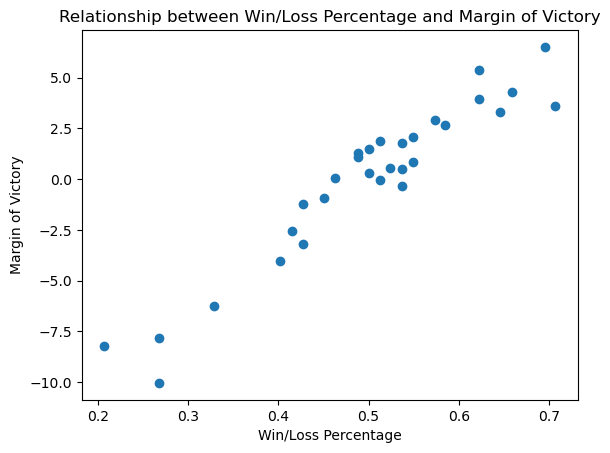

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('nba球队数据.csv')

win_loss_percentage = data['W/L%']
margin_of_victory = data['MOV']

plt.scatter(win_loss_percentage, margin_of_victory)

plt.title('Relationship between Win/Loss Percentage and Margin of Victory')
plt.xlabel('Win/Loss Percentage')
plt.ylabel('Margin of Victory')

plt.show()

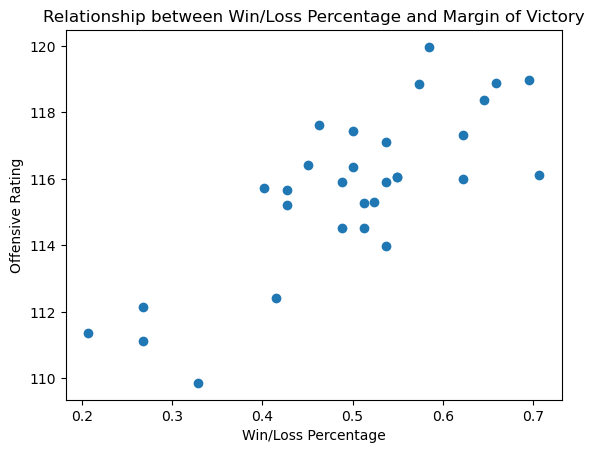

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('nba球队数据.csv')

win_loss_percentage = data['W/L%']
margin_of_victory = data['ORtg']

plt.scatter(win_loss_percentage, margin_of_victory)

plt.title('Relationship between Win/Loss Percentage and Margin of Victory')
plt.xlabel('Win/Loss Percentage')
plt.ylabel('Offensive Rating')

plt.show()

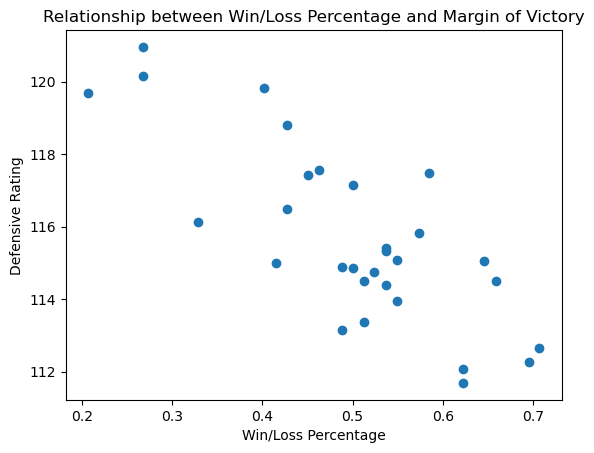

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('nba球队数据.csv')

win_loss_percentage = data['W/L%']
margin_of_victory = data['DRtg']

plt.scatter(win_loss_percentage, margin_of_victory)

plt.title('Relationship between Win/Loss Percentage and Margin of Victory')
plt.xlabel('Win/Loss Percentage')
plt.ylabel('Defensive Rating')

plt.show()

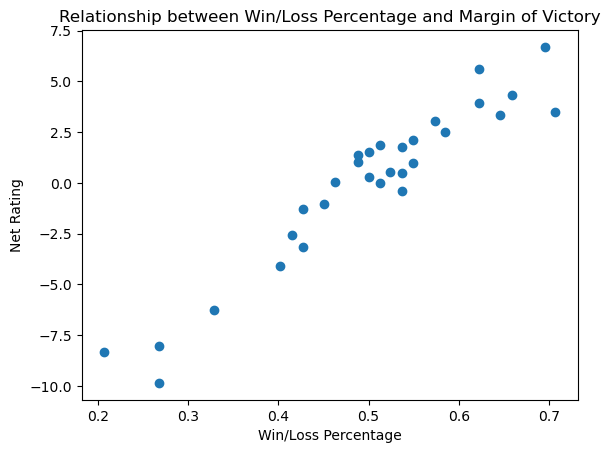

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('nba球队数据.csv')

win_loss_percentage = data['W/L%']
margin_of_victory = data['NRtg']

plt.scatter(win_loss_percentage, margin_of_victory)

plt.title('Relationship between Win/Loss Percentage and Margin of Victory')
plt.xlabel('Win/Loss Percentage')
plt.ylabel('Net Rating')

plt.show()

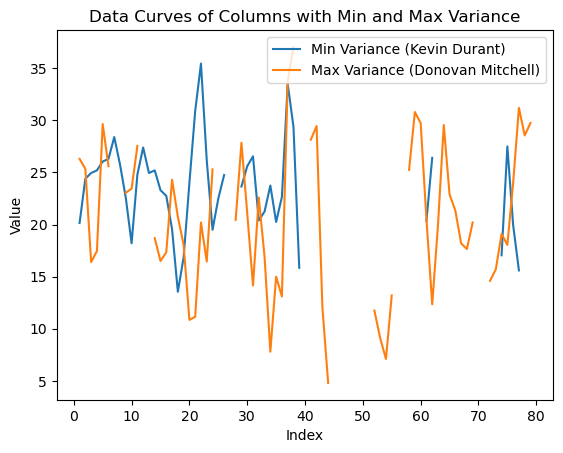

In [7]:
import pandas as pd
import numpy as np

# 读取CSV文件
df = pd.read_csv('22-23赛季球员GmSc.csv')

# 去除第一列数据
df = df.iloc[:, 1:]

# 计算每列的方差
variances = df.var()

# 找出方差最大和最小的列名
min_var_column = variances.idxmin()
max_var_column = variances.idxmax()

window_size = 2
min_var_ma = df[min_var_column].rolling(window_size).mean()
min_var_ma = min_var_ma[window_size - 1:]

# 对最大方差列进行移动平均
max_var_ma = df[max_var_column].rolling(window_size).mean()
max_var_ma = max_var_ma[window_size - 1:]

# 绘制曲线
plt.plot(min_var_ma, label=f'Min Variance ({min_var_column})')
plt.plot(max_var_ma, label=f'Max Variance ({max_var_column})')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Data Curves of Columns with Min and Max Variance')
plt.legend()
plt.show()

/tmp/ipykernel_112/3578529984.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


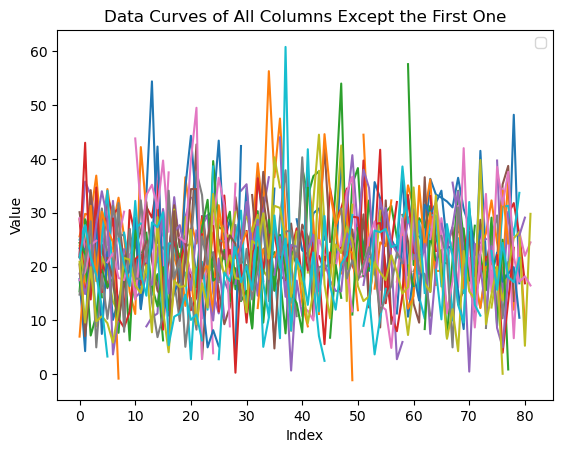

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
df = pd.read_csv('22-23赛季球员GmSc.csv')

# 去除第一列数据
df = df.iloc[:, 1:]

# 获取列名列表
column_names = df.columns

# 绘制每一列的曲线
for column in column_names:
    plt.plot(df[column])

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Data Curves of All Columns Except the First One')
plt.legend()
plt.show()

In [26]:
import pandas as pd

# 加载 CSV 文件，假设文件路径为 file_path
def load_data(file_path):
    return pd.read_csv(file_path)

# 计算并分类球员表现
def classify_player_performance(data, stability_threshold=8):
    # 提取 GmSc 相关的列名，即从第二列开始的所有列
    gmsc_columns = data.columns[1:]

# 提取 GmSc 相关的列名，即从第二列开始的所有列
    gmsc_columns = data.columns[1:]

# 计算每个球员的所有 GmSc 的标准差
    player_gmsc_stds = data[gmsc_columns].std(axis=1)

# 计算所有球员的标准差的平均值（结果保留两位小数）
    avg_std = player_gmsc_stds.mean().round(2)

    print(avg_std)


    
    # 使用每个球员的所有 GmSc 值计算标准差，用于衡量球员表现的稳定性
    data['GmSc_Stability'] = data[gmsc_columns].std(axis=1)
    
    # 设置阈值，找出表现较为稳定的球员和表现较为不稳定的球员。小于阈值（这里设置为3）的球员为表现稳定型
    player_stable_names = data[data['GmSc_Stability'] < stability_threshold]['PlayerName']
    player_unstable_names = data[data['GmSc_Stability'] >= stability_threshold]['PlayerName']
    
    # 计算赛季初 vs 赛季末的8场比赛中相关表现
    seasons_first_8_mean = data[gmsc_columns[:20]].mean(axis=1)
    seasons_last_8_mean = data[gmsc_columns[-20:]].mean(axis=1)
    data['compared_with_first8 (season improvement)'] = round(seasons_last_8_mean - seasons_first_8_mean, 2)
    
    # 查找赛季进步型和退步型的球员
    player_improvement_names = data[data['compared_with_first8 (season improvement)'] > 0]['PlayerName']
    player_decline_names = data[data['compared_with_first8 (season improvement)'] < 0]['PlayerName']
    
    # 整理结果
    result_df = pd.DataFrame(
        {
            '赛季进步型球员': pd.Series(player_improvement_names).drop_duplicates().reset_index(drop=True),
            '赛季退步型球员': pd.Series(player_decline_names).drop_duplicates().reset_index(drop=True),
            '表现稳定型球员': pd.Series(player_stable_names).drop_duplicates().reset_index(drop=True),
            '表现起伏波动较大球员': pd.Series(player_unstable_names).drop_duplicates().reset_index(drop=True),
        }
    )

    return result_df

# 主函数
if __name__ == "__main__":
    file_path = '22-23赛季球员GmSc1.csv'
    data = load_data(file_path)
    result_df = classify_player_performance(data)
    print(result_df)

8.46
                    赛季进步型球员           赛季退步型球员                  表现稳定型球员  \
0               Joel Embiid       Luka Dončić  Shai Gilgeous-Alexander   
1            Damian Lillard      Jayson Tatum             Kevin Durant   
2   Shai Gilgeous-Alexander     Stephen Curry             Jaylen Brown   
3     Giannis Antetokounmpo      Kevin Durant                Ja Morant   
4              Devin Booker      LeBron James               Trae Young   
5              Kyrie Irving  Donovan Mitchell          Lauri Markkanen   
6              Jaylen Brown         Ja Morant            Julius Randle   
7           Lauri Markkanen        Trae Young             De'Aaron Fox   
8             Julius Randle     Anthony Davis                      NaN   
9                       NaN      De'Aaron Fox                      NaN   
10                      NaN               NaN                      NaN   
11                      NaN               NaN                      NaN   

               表现起伏波动较大球员  
0   

In [27]:
import pandas as pd

# 读取CSV文件
data = pd.read_csv('nba1.csv')

# 定义计算GmSc的函数
def calculate_gmsc(row):
    pts = row['PTS']
    oreb = row['ORB']
    dreb = row['DRB']
    ast = row['AST']
    stl = row['STL']
    blk = row['BLK']
    fgm = row['FG']
    fga = row['FGA']
    fta = row['FTA']
    ftm = row['FT']
    tov = row['TOV']
    pf = row['PF']
    return (pts + 0.7 * oreb + 0.3 * dreb + 0.7 * ast + stl + 0.7 * blk) + 0.4 * fgm - 0.7 * fga - 0.4 * (fta - ftm) - tov - 0.4 * pf

# 计算每个球员的GmSc值并添加到新列
data['GmSc'] = data.apply(calculate_gmsc, axis=1)

# 显示结果
print(data[['Player', 'GmSc']])

              Player   GmSc
0         A.J. Green   2.91
1        A.J. Lawson   1.60
2        A.J. Lawson   2.38
3        A.J. Lawson   2.40
4         AJ Griffin   6.23
..               ...    ...
675     Zach Collins   9.59
676      Zach LaVine  17.48
677       Zeke Nnaji   3.94
678  Ziaire Williams   3.19
679  Zion Williamson  20.94

[680 rows x 2 columns]


Pos
C     7.053000
PF    7.512213
PG    8.357521
SF    6.183556
SG    6.556061
Name: GmSc, dtype: float64


/tmp/ipykernel_119/758330007.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(pos_data, labels=data['Pos'].unique())
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32622 (\N{CJK UNIFIED IDEOGRAPH-7F6E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5

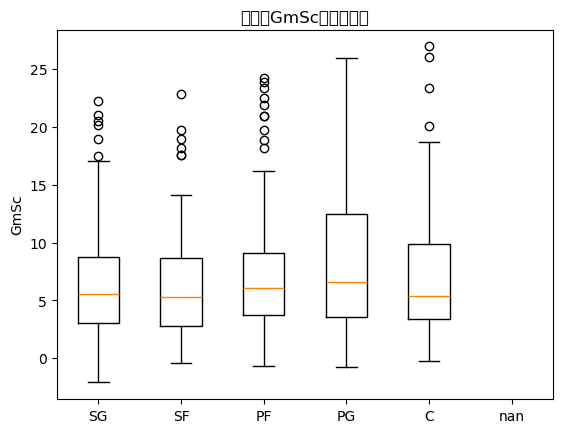

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv('nba1.csv')

# 定义计算GmSc的函数
def calculate_gmsc(row):
    pts = row['PTS']
    oreb = row['ORB']
    dreb = row['DRB']
    ast = row['AST']
    stl = row['STL']
    blk = row['BLK']
    fgm = row['FG']
    fga = row['FGA']
    fta = row['FTA']
    ftm = row['FT']
    tov = row['TOV']
    pf = row['PF']
    return (pts + 0.7 * oreb + 0.3 * dreb + 0.7 * ast + stl + 0.7 * blk) + 0.4 * fgm - 0.7 * fga - 0.4 * (fta - ftm) - tov - 0.4 * pf

# 计算每个球员的GmSc值并添加到新列
data['GmSc'] = data.apply(calculate_gmsc, axis=1)

# 按位置分组并计算GmSc平均值
pos_gmsc_means = data.groupby('Pos')['GmSc'].mean()

# 输出结果
print(pos_gmsc_means)

pos_data = [data[data['Pos'] == pos]['GmSc'] for pos in data['Pos'].unique()]

# 绘制箱线图
plt.boxplot(pos_data, labels=data['Pos'].unique())
plt.title('各位置GmSc分布箱线图')
plt.ylabel('GmSc')
plt.show()

In [33]:
import pandas as pd

# 读取CSV文件
data = pd.read_csv('nba1.csv')

# 定义计算GmSc的函数
def calculate_gmsc(row):
    pts = row['PTS']
    oreb = row['ORB']
    dreb = row['DRB']
    ast = row['AST']
    stl = row['STL']
    blk = row['BLK']
    fgm = row['FG']
    fga = row['FGA']
    fta = row['FTA']
    ftm = row['FT']
    tov = row['TOV']
    pf = row['PF']
    return (pts + 0.7 * oreb + 0.3 * dreb + 0.7 * ast + stl + 0.7 * blk) + 0.4 * fgm - 0.7 * fga - 0.4 * (fta - ftm) - tov - 0.4 * pf

# 计算每个球员的GmSc值并添加到新列
data['GmSc'] = data.apply(calculate_gmsc, axis=1)

# 按Team分组并选取每个组中GmSc前3高的行
top_3_gmsc_per_team = data.groupby('Team').apply(lambda x: x.nlargest(2, 'GmSc')).reset_index(drop=True)

# 统计每个位置的数量
pos_counts = top_3_gmsc_per_team['Pos'].value_counts()

# 输出结果
print("每个位置的数量统计：")
print(pos_counts)

每个位置的数量统计：
Pos
PG    19
PF    14
SG    13
SF     9
C      7
Name: count, dtype: int64


/tmp/ipykernel_131/3858869359.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_gmsc_per_team = data.groupby('Team').apply(lambda x: x.nlargest(2, 'GmSc')).reset_index(drop=True)


/tmp/ipykernel_119/103604517.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_gmsc_per_team = data.groupby('Team').apply(lambda x: x.nlargest(2, 'GmSc')).reset_index(drop=True)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32622 (\N{CJK U

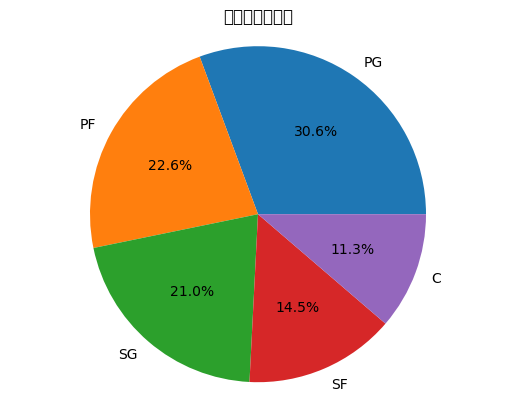

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv('nba1.csv')

# 定义计算GmSc的函数
def calculate_gmsc(row):
    pts = row['PTS']
    oreb = row['ORB']
    dreb = row['DRB']
    ast = row['AST']
    stl = row['STL']
    blk = row['BLK']
    fgm = row['FG']
    fga = row['FGA']
    fta = row['FTA']
    ftm = row['FT']
    tov = row['TOV']
    pf = row['PF']
    return (pts + 0.7 * oreb + 0.3 * dreb + 0.7 * ast + stl + 0.7 * blk) + 0.4 * fgm - 0.7 * fga - 0.4 * (fta - ftm) - tov - 0.4 * pf

# 计算每个球员的GmSc值并添加到新列
data['GmSc'] = data.apply(calculate_gmsc, axis=1)

# 按Team分组并选取每个组中GmSc前3高的行
top_3_gmsc_per_team = data.groupby('Team').apply(lambda x: x.nlargest(2, 'GmSc')).reset_index(drop=True)

# 统计每个位置的数量
pos_counts = top_3_gmsc_per_team['Pos'].value_counts()

# 绘制饼状图
plt.pie(pos_counts, labels=pos_counts.index, autopct='%1.1f%%')
plt.axis('equal')  
plt.title('各位置数量占比')
plt.show()

Team_players
2TM    6.453857
ATL    6.683500
BOS    7.174444
BRK    7.616400
CHI    6.520000
CHO    7.800000
CLE    7.047778
DAL    6.660000
DEN    7.400556
DET    6.802273
GSW    7.618333
HOU    6.339444
IND    7.148000
LAC    7.709048
LAL    7.042917
MEM    7.600526
MIA    6.922500
MIL    6.962381
MIN    7.253500
NOP    8.072353
NYK    7.258824
OKC    7.244211
ORL    7.063000
PHI    7.275238
PHO    8.441000
POR    7.681667
SAC    5.759000
SAS    7.090000
TOR    6.861000
UTA    6.858261
WAS    6.385217
Name: GmSc, dtype: float64


/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29699 (\N{CJK UNIFIED IDEOGRAPH-7403}) missing from font(s) DejaVu Sans.
  fig.canvas

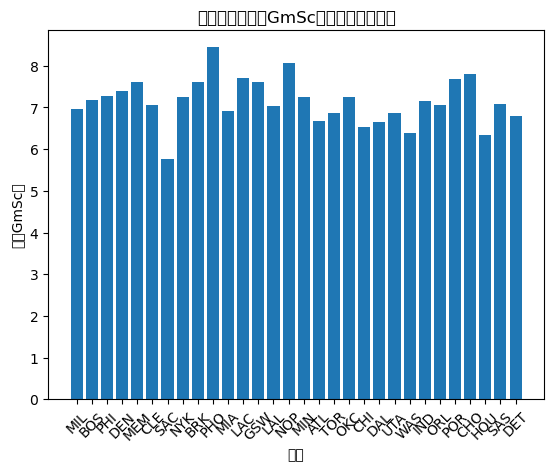

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取第一个CSV文件，其中包含W/L%和Team列
df_wl = pd.read_csv('nba球队数据1.csv')

# 按照W/L%由高到低对数据进行排序，并提取Team列
sorted_teams = df_wl.sort_values(by='W/L%', ascending=False)['Team']

# 读取第二个CSV文件，其中包含Player、Team等相关列用于计算GmSc
df_players = pd.read_csv('nba1.csv')
df_players = df_players.rename(columns={'Team': 'Team_players'})


def calculate_gmsc(row):
    pts = row['PTS']
    oreb = row['ORB']
    dreb = row['DRB']
    ast = row['AST']
    stl = row['STL']
    blk = row['BLK']
    fgm = row['FG']
    fga = row['FGA']
    fta = row['FTA']
    ftm = row['FT']
    tov = row['TOV']
    pf = row['PF']
    gmsc_value = (pts + 0.7 * oreb + 0.3 * dreb + 0.7 * ast + stl + 0.7 * blk) + 0.4 * fgm - 0.7 * fga - 0.4 * (fta - ftm) - tov - 0.4 * pf
    return gmsc_value
# 计算每个球员的GmSc值并添加到新列
df_players['GmSc'] = df_players.apply(calculate_gmsc, axis=1)

# 按照之前排序好的Team顺序来分组并计算每个组内球员GmSc的平均值
grouped = df_players.groupby('Team_players')
average_GmSc = grouped['GmSc'].mean()
print(average_GmSc)

# 将平均GmSc值按照sorted_teams的顺序进行排序
sorted_average_GmSc = average_GmSc.loc[sorted_teams]

# 绘制柱状图展示按照排序后的各球队平均GmSc值
plt.bar(sorted_average_GmSc.index, sorted_average_GmSc.values)
plt.xlabel('球队')
plt.ylabel('平均GmSc值')
plt.title('各球队球员平均GmSc值（按胜率排序）')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_119/418039642.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  average_GmSc = grouped.apply(lambda x: x.nlargest(9, 'GmSc')['GmSc'].mean())
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) miss

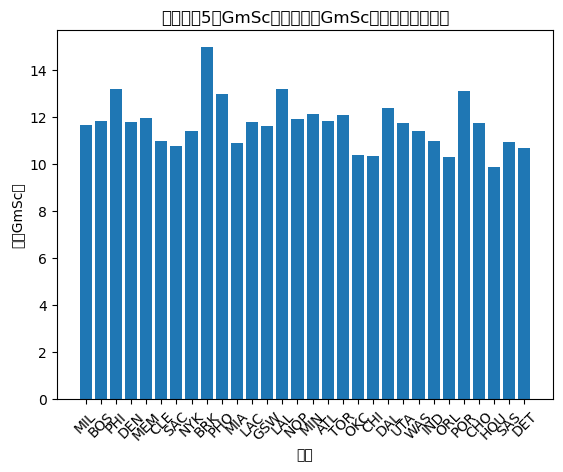

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取第一个CSV文件，其中包含W/L%和Team列
df_wl = pd.read_csv('nba球队数据1.csv')

# 按照W/L%由高到低对数据进行排序，并提取Team列
sorted_teams = df_wl.sort_values(by='W/L%', ascending=False)['Team']

# 读取第二个CSV文件，其中包含Player、Team等相关列用于计算GmSc
df_players = pd.read_csv('nba1.csv')
df_players = df_players.rename(columns={'Team': 'Team_players'})


def calculate_gmsc(row):
    pts = row['PTS']
    oreb = row['ORB']
    dreb = row['DRB']
    ast = row['AST']
    stl = row['STL']
    blk = row['BLK']
    fgm = row['FG']
    fga = row['FGA']
    fta = row['FTA']
    ftm = row['FT']
    tov = row['TOV']
    pf = row['PF']
    gmsc_value = (pts + 0.7 * oreb + 0.3 * dreb + 0.7 * ast + stl + 0.7 * blk) + 0.4 * fgm - 0.7 * fga - 0.4 * (fta - ftm) - tov - 0.4 * pf
    return gmsc_value
# 计算每个球员的GmSc值并添加到新列
df_players['GmSc'] = df_players.apply(calculate_gmsc, axis=1)

# 按照之前排序好的Team顺序来分组并计算每个组内球员GmSc的平均值
grouped = df_players.groupby('Team_players')
average_GmSc = grouped.apply(lambda x: x.nlargest(9, 'GmSc')['GmSc'].mean())

# 将平均GmSc值按照sorted_teams的顺序进行排序
sorted_average_GmSc = average_GmSc.loc[sorted_teams]

# 绘制柱状图展示按照排序后的各球队平均GmSc值
plt.bar(sorted_average_GmSc.index, sorted_average_GmSc.values)
plt.xlabel('球队')
plt.ylabel('平均GmSc值')
plt.title('各球队前5高GmSc球员的平均GmSc值（按胜率排序）')
plt.xticks(rotation=45)
plt.show()
